  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

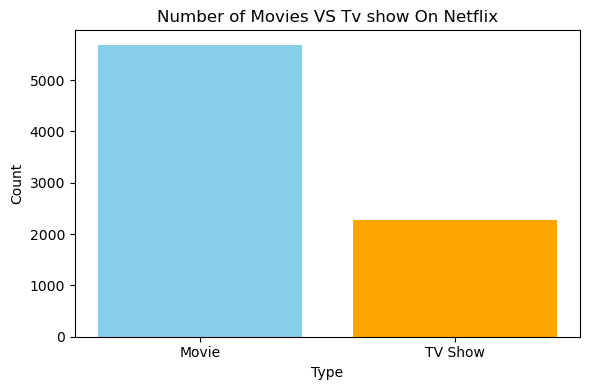

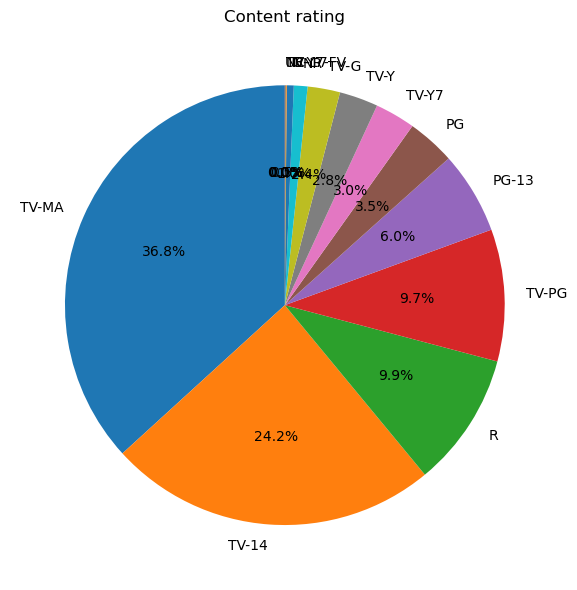

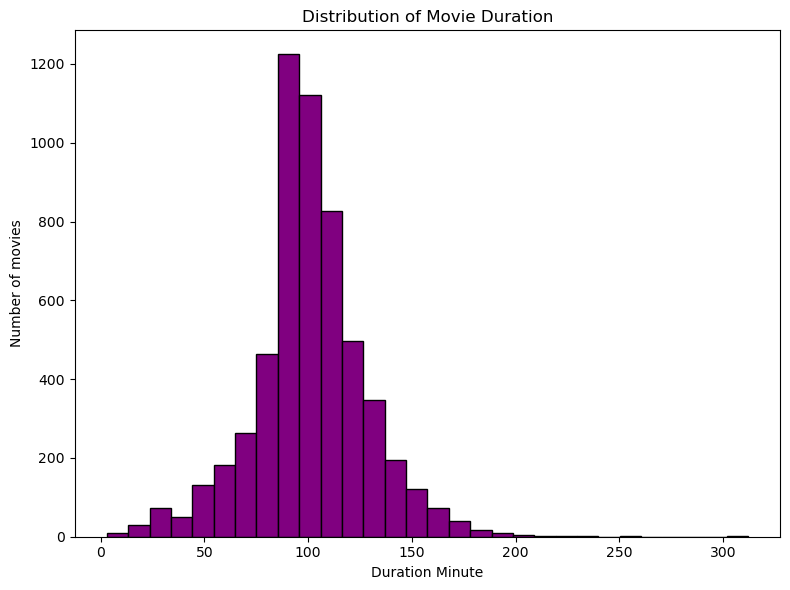

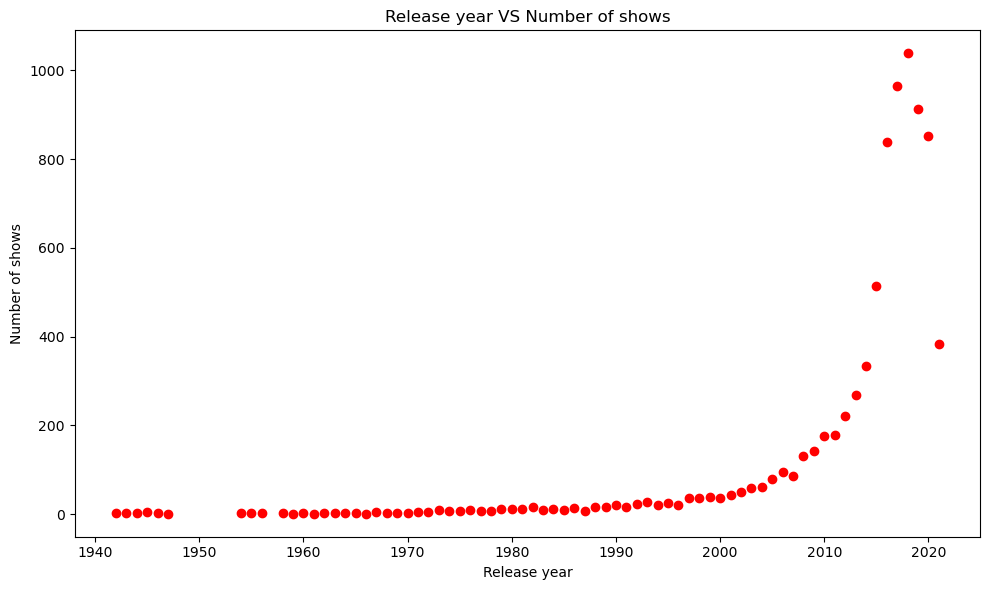

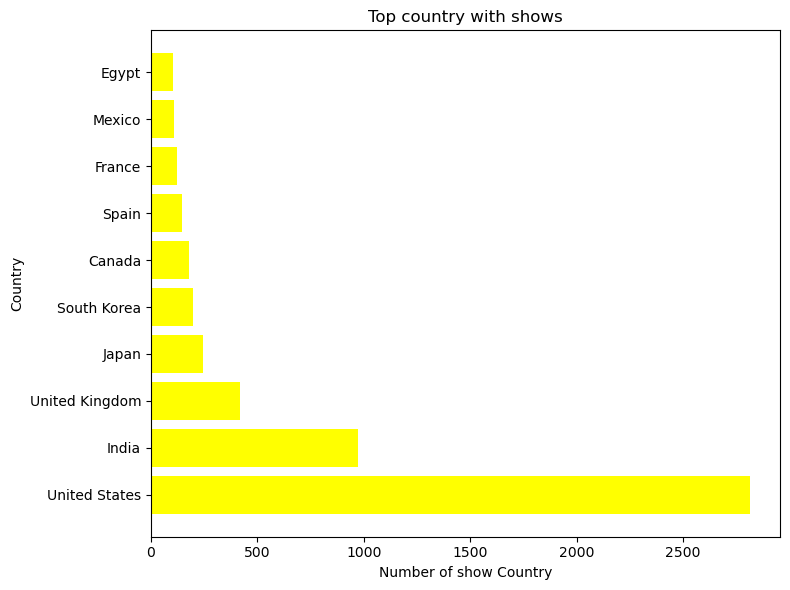

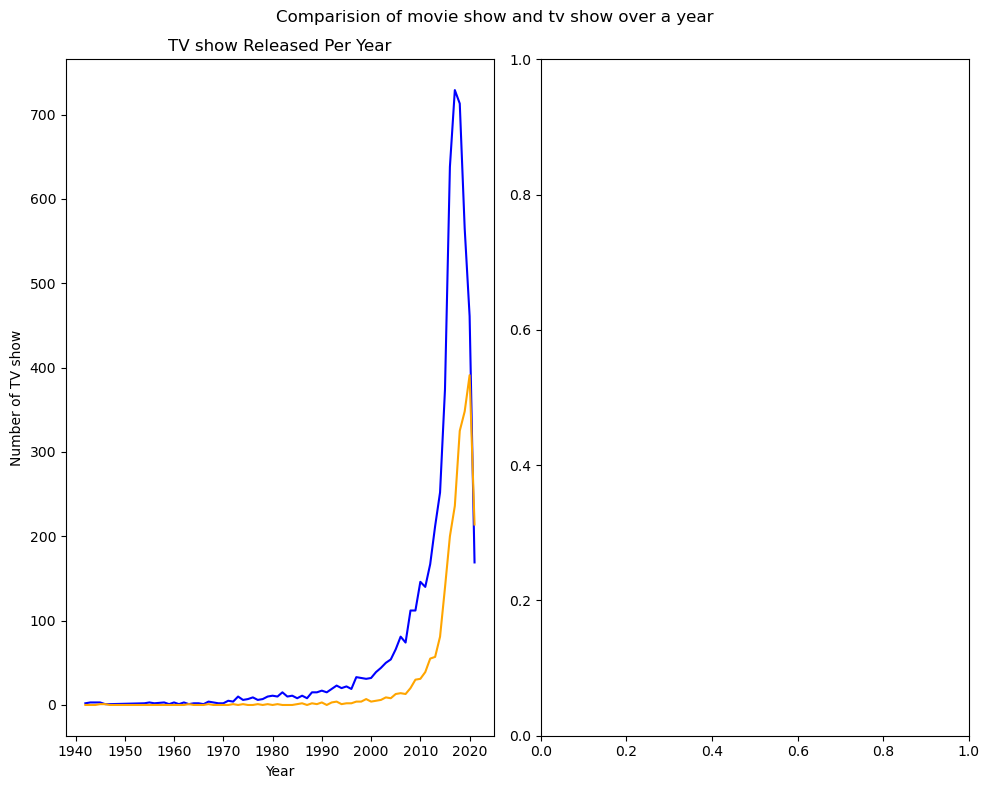

In [41]:
#import library
import pandas as pd
import matplotlib.pyplot as plt

# load dataset
df=pd.read_csv("netflix_titles.csv")
print(df.head())

#clean data
df=df.dropna(subset=['type','release_year','rating','country','duration'])
# print(df.describe())

type_counts=df['type'].value_counts()
plt.figure(figsize=(6,4))
plt.bar(type_counts.index, type_counts.values,color=['skyblue','orange'])
plt.title("Number of Movies VS Tv show On Netflix")
plt.xlabel("Type")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("movies_vs_tvshows.png")
plt.show()

rating_counts = df['rating'].value_counts()
plt.figure(figsize=(8,6))
plt.pie(rating_counts, labels =rating_counts.index,autopct='%1.1f%%',startangle=90)
plt.title("Content rating")
plt.tight_layout()
plt.savefig("content_rating.png")
plt.show()

movie_df = df[df['type'] == 'Movie'].copy()
movie_df['duration_int'] = movie_df['duration'].str.replace('min','').astype(int)
plt.figure(figsize=(8,6))
plt.hist(movie_df['duration_int'],bins=30,color='purple',edgecolor='black')
plt.title("Distribution of Movie Duration")
plt.xlabel("Duration Minute")
plt.ylabel("Number of movies")
plt.tight_layout()
plt.savefig("Movie_Duration_hist.png")
plt.show()

release_counts = df['release_year'].value_counts().sort_index()
plt.figure(figsize=(10,6))
plt.scatter(release_counts.index,release_counts.values,color="red")
plt.title("Release year VS Number of shows")
plt.xlabel("Release year")
plt.ylabel("Number of shows")
plt.tight_layout()
plt.savefig("Releaseyear_scatter.png")
plt.show()


country_counts = df['country'].value_counts().head(10)
plt.figure(figsize=(8,6))
plt.barh(country_counts.index,country_counts.values,color="yellow")
plt.title("Top country with shows")
plt.xlabel("Number of show Country")
plt.ylabel("Country")
plt.tight_layout()
plt.savefig("Country counts.png")
plt.show()

content_by_year = df.groupby(['release_year','type']).size().unstack().fillna(0)
fig, ax= plt.subplots(1,2,figsize=(10,8))
#subplot 1
ax[0].plot(content_by_year.index,content_by_year['Movie'],color="blue")
ax[0].set_title("Movies Released Per Year")
ax[0].set_xlabel("Year")
ax[0].set_ylabel("Number of Movies")

#supplot2
ax[0].plot(content_by_year.index,content_by_year['TV Show'],color="orange")
ax[0].set_title("TV show Released Per Year")
ax[0].set_xlabel("Year")
ax[0].set_ylabel("Number of TV show")
fig.suptitle("Comparision of movie show and tv show over a year")
plt.tight_layout()
plt.savefig('movies_tv_shows_comparision.png')
plt.show()





                
